In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ирисы

![](iris.jpg)

In [23]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Вино

![](wine.jpg)

In [24]:
from sklearn import datasets 
wine = datasets.load_wine()
wine_data = pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=0)
wine_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

# Титаник (https://www.kaggle.com/datasets/yasserh/titanic-dataset)

![](titanic.jpg)

In [25]:
titanic = pd.read_csv('Titanic-Dataset.csv', sep=',')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA - NaN

In [26]:
len(titanic)

891

In [27]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
titanic[(titanic['Age'].isna()) | (titanic['Cabin'].isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [29]:
titanic[(titanic['Embarked'].isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [30]:
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [31]:
titanic = titanic.drop('Cabin', axis=1)

titanic['Embarked'] = titanic['Embarked'].fillna('S')

titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [32]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA - outliers

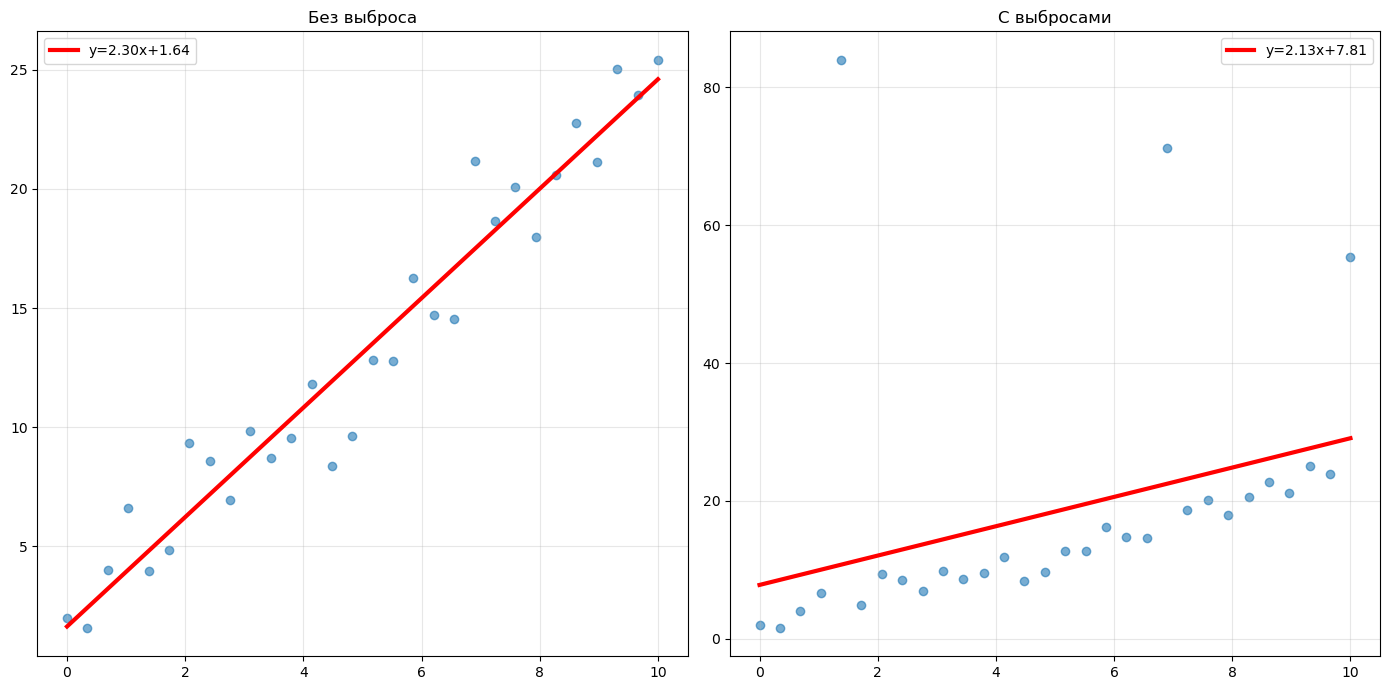

In [33]:
# Создаем линейный датасет
np.random.seed(42)
x = np.linspace(0, 10, 30)
y = 2.5 * x + 1.0 + np.random.normal(0, 2, 30)

# Регрессия без выброса
coeff = np.polyfit(x, y, 1)
y_fit = np.poly1d(coeff)(x)

# Добавляем выбросы
y_outlier = y.copy()
y_outlier[4] += 80
y_outlier[20] += 50
y_outlier[29] += 30

# Регрессия с выбросами
coeff_out = np.polyfit(x, y_outlier, 1)
y_fit_out = np.poly1d(coeff_out)(x)

# Графики
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(x, y, alpha=0.6)
plt.plot(x, y_fit, 'r-', linewidth=3, label=f'y={coeff[0]:.2f}x+{coeff[1]:.2f}')
plt.title('Без выброса')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(x, y_outlier, alpha=0.6)
plt.plot(x, y_fit_out, 'r-', linewidth=3, label=f'y={coeff_out[0]:.2f}x+{coeff_out[1]:.2f}')
plt.title('С выбросами')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Корреляции

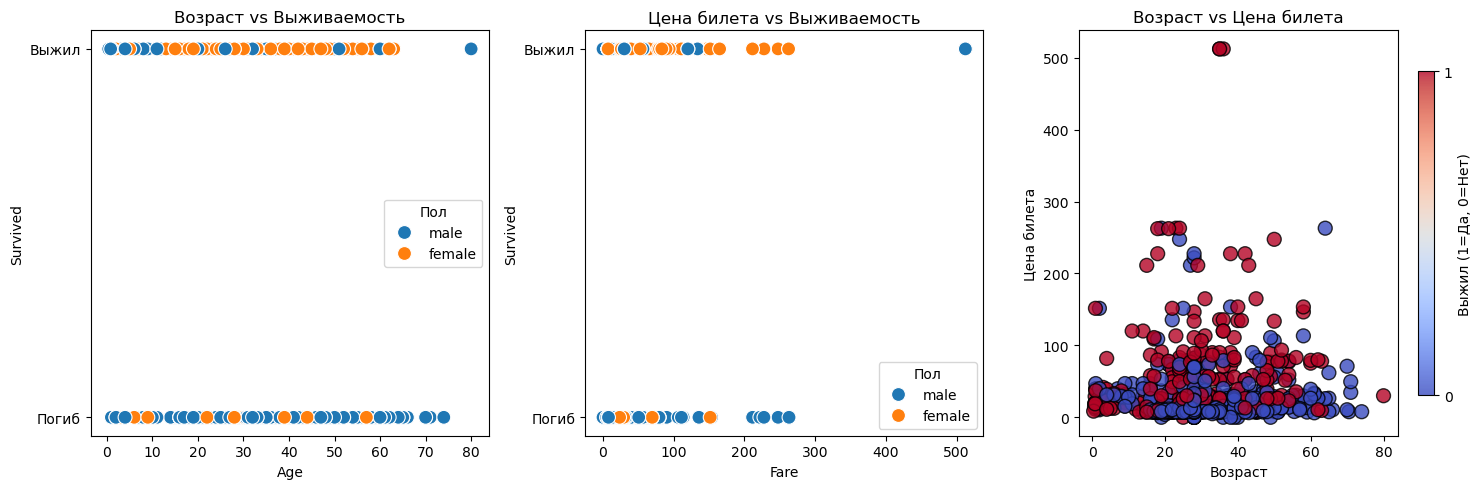

In [34]:
titanic_copy = titanic.copy()

# Кодируем категориальные переменные
titanic_copy['Sex_code'] = titanic_copy['Sex'].map({'male': 1, 'female': 0})
titanic_copy['Embarked_code'] = titanic_copy['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Создаем scatter plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# 1. Возраст vs Выживаемость
sns.scatterplot(data=titanic_copy, x='Age', y='Survived', hue='Sex', s=100, ax=axes[0])
axes[0].set_title('Возраст vs Выживаемость')
axes[0].set_yticks([0, 1])
axes[0].set_yticklabels(['Погиб', 'Выжил'])
axes[0].legend(title='Пол')

# 2. Цена билета vs Выживаемость
sns.scatterplot(data=titanic_copy, x='Fare', y='Survived', hue='Sex', s=100, ax=axes[1])
axes[1].set_title('Цена билета vs Выживаемость')
axes[1].set_yticks([0, 1])
axes[1].set_yticklabels(['Погиб', 'Выжил'])
axes[1].legend(title='Пол')

# 3. Возраст vs Цена билета
scatter = axes[2].scatter(titanic_copy['Age'], titanic_copy['Fare'], 
                         c=titanic_copy['Survived'], cmap='coolwarm', 
                         s=100, alpha=0.8, edgecolors='black')
axes[2].set_title('Возраст vs Цена билета')
axes[2].set_xlabel('Возраст')
axes[2].set_ylabel('Цена билета')

# Добавляем цветовую шкалу
cbar = plt.colorbar(scatter, ax=axes[2], shrink=0.8)
cbar.set_label('Выжил (1=Да, 0=Нет)')
cbar.set_ticks([0, 1])

plt.tight_layout()
plt.show()

# Feature engineering -  One-hot encoding

In [35]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


![](onehotencoding.jpg)

In [36]:
titanic['Sex'] = titanic['Sex'].replace(['male', 'female'], [1, 0])

titanic = pd.get_dummies(titanic, columns=['Embarked'])
titanic[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = titanic[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype('int64')

titanic.head()

C:\Users\nikri\AppData\Local\Temp\ipykernel_6420\3655429276.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['Sex'] = titanic['Sex'].replace(['male', 'female'], [1, 0])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1


In [37]:
titanic = titanic.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


# Разбивка данных - train/test

In [38]:
len(titanic)

891

In [39]:
from sklearn.model_selection import train_test_split

titanic_y = titanic['Survived']
titanic_X = titanic.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(titanic_X,
                                                    titanic_y,
                                                    test_size=0.3,
                                                    random_state=42)
print(len(X_train))
X_train.head()

623


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
445,1,1,4.0,0,2,81.8583,0,0,1
650,3,1,28.0,0,0,7.8958,0,0,1
172,3,0,1.0,1,1,11.1333,0,0,1
450,2,1,36.0,1,2,27.7500,0,0,1
314,2,1,43.0,1,1,26.2500,0,0,1


In [40]:
print(len(X_test))
X_test.head()

268


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
709,3,1,28.0,1,1,15.2458,1,0,0
439,2,1,31.0,0,0,10.5000,0,0,1
840,3,1,20.0,0,0,7.9250,0,0,1
720,2,0,6.0,0,1,33.0000,0,0,1
39,3,0,14.0,1,0,11.2417,1,0,0


# Разбивка данных - train/validation/test

![](train-validation-test.png)

# Разбивка данных - cross validation

![](cross-validation.webp)

# Модели машинного обучения - линейная регрессия

![](linear_regression.png)

In [41]:
from sklearn.linear_model import LinearRegression
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

y_pred_linear_regression = model_linear_regression.predict(X_test)

![](rmse.webp)

In [42]:
from sklearn.metrics import root_mean_squared_error
print("RMSE:", root_mean_squared_error(y_test, y_pred_linear_regression))

RMSE: 0.3688459101815629


# Ансамблевые модели - градиентный бустинг

![](gradient-boosting.png)

# Ансамблевые модели - случайный лес

![](Random-forest.png)